<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [34]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [36]:
data = pd.read_csv('./train.csv')
X_test = pd.read_csv('./test.csv')

In [37]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [38]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [40]:
data[data['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [41]:
data[data['TotalSpent'] == ' '].shape

(9, 20)

In [42]:
# Преобразуем Total Spent из object в float, заменив пропуски на нули
data['TotalSpent'] = data['TotalSpent'].replace(to_replace=' ', value=0).astype(float)
X_test['TotalSpent'] = X_test['TotalSpent'].replace(to_replace=' ', value=0).astype(float)

In [43]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

### Comment
> Пропущенные значения были в Total Spent. Были заменены на нули

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [44]:
import seaborn as sns

### Численные данные

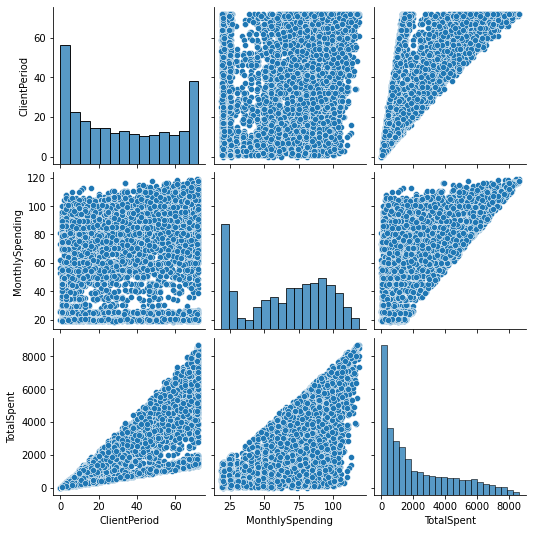

In [128]:
sns.pairplot(data[num_cols])

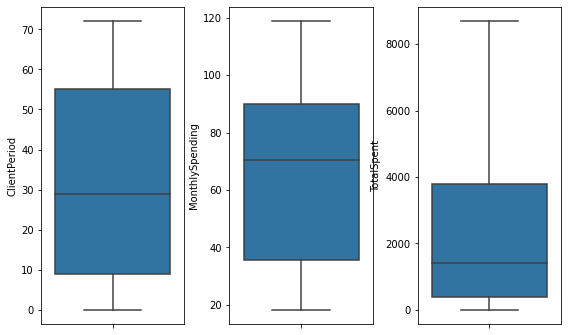

In [126]:
fig, ax = plt.subplots(1, 3, figsize=(8, 5))
fig.tight_layout()
for i, feature in enumerate(num_cols):
    sns.boxplot(ax=ax[i], y=data[feature], orient='v')

In [47]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ClientPeriod,5282.0,32.397009,24.550326,0.00,9.0000,29.00,55.0000,72.00
MonthlySpending,5282.0,64.924754,30.176464,18.25,35.4625,70.40,90.0500,118.75
TotalSpent,5282.0,2287.486161,2269.049195,0.00,395.7250,1405.65,3795.2125,8684.80


### Категориальные данные

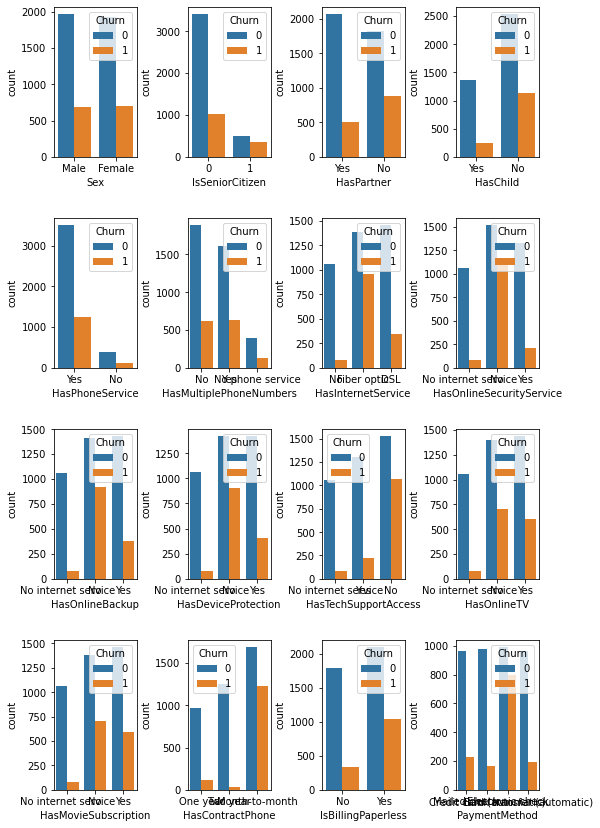

In [121]:
fig, ax = plt.subplots(4, 4, figsize=(8, 12))
fig.tight_layout(h_pad=4, w_pad=2, pad=3)
row, col = 0, 0
for i, feat in enumerate(cat_cols):
    sns.countplot(x=feat, data=data, ax=ax[row, col], hue='Churn')
#     ax[row, col].pie(data[feat].value_counts())
    col += 1
    if col == 4:
        row += 1
        col = 0

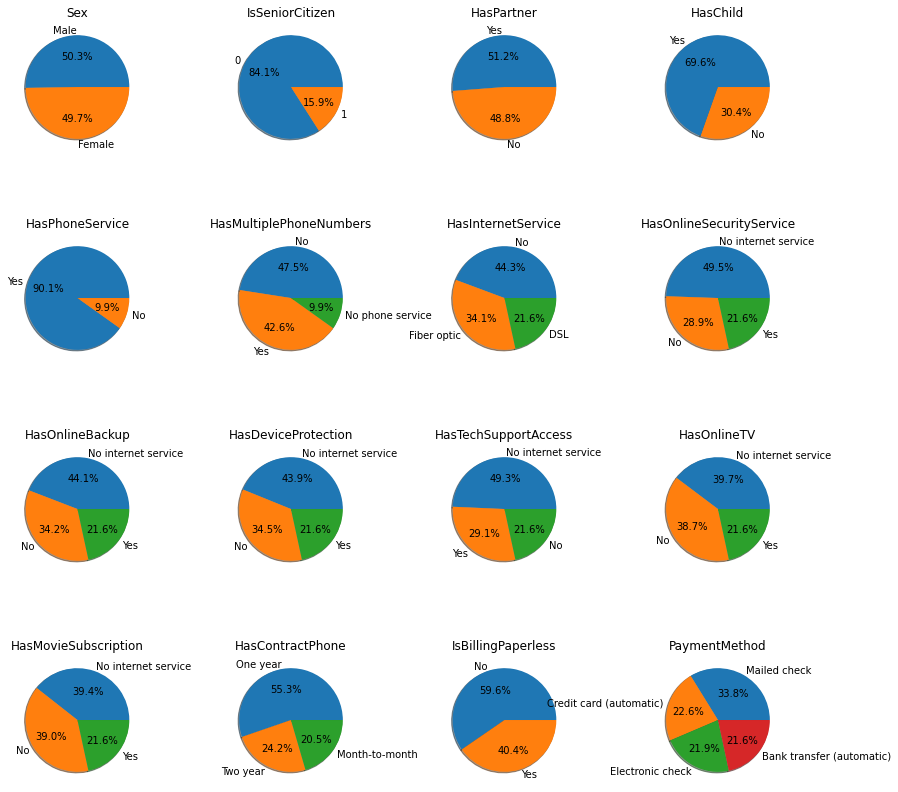

In [49]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
fig.tight_layout(h_pad=4, w_pad=5, pad=3)
row, col = 0, 0
for i, feat in enumerate(cat_cols):
#     sns.countplot(x=feat, data=data, ax=ax[row, col])
    ax[row, col].pie(data[feat].value_counts(), labels=data[feat].unique(), shadow = True, autopct='%1.1f%%')
    ax[row, col].set_title(feat)
    col += 1
    if col == 4:
        row += 1
        col = 0

0    0.737978
1    0.262022
Name: Churn, dtype: float64

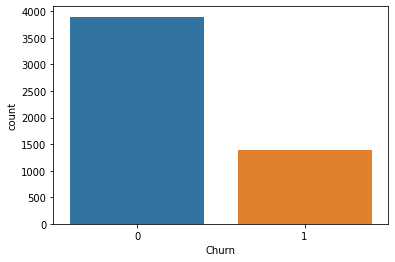

In [50]:
# Баланс классов
sns.countplot(x=data[target_col]);
data[target_col].value_counts(normalize=True)

### Comment
> Да, классы не сбалансированы

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

### Comment
> Выбросов не обнаружено

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [90]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

In [52]:
missing_cols = set(data[cat_cols]) - set(X_test[cat_cols])
for c in missing_cols:
    X_test[c] = 0
X_test = X_test[data[feature_cols].columns]

In [53]:
data_cat_onehot = pd.get_dummies(data[cat_cols])
test_cat_onehot = pd.get_dummies(X_test[cat_cols])
train = pd.concat([data[num_cols], data_cat_onehot], axis=1)
test = pd.concat([X_test[num_cols], test_cat_onehot], axis=1)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression())
])

In [54]:
params = {
    'logit__C': [100, 10, 1, 0.1, 0.01, 0.001]
}
logit = LogisticRegression()
grid = GridSearchCV(pipeline, params, scoring='roc_auc', cv=5, n_jobs=-1, refit=True)
grid.fit(train, data[target_col])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logit', LogisticRegression())]),
             n_jobs=-1, param_grid={'logit__C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [55]:
print('best score: %f' % grid.best_score_)
print('best params: %s' % grid.best_params_)

best score: 0.845128
best params: {'logit__C': 100}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

### make submisstion by logreg

In [57]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = grid.best_estimator_.predict_proba(test)[:, 1]
submission.to_csv('./my_submission_logreg.csv', index=False)

In [59]:
### Kaggle result: 0.84585
### Team: Vlad_Kremenevskiy

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [63]:
from catboost import CatBoostClassifier

In [64]:
x_train, x_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], train_size=0.2)

In [65]:
%%time
catboost = CatBoostClassifier(cat_features=cat_cols)
catboost.fit(x_train[feature_cols], y_train, verbose=False)

CPU times: user 8.69 s, sys: 329 ms, total: 9.02 s
Wall time: 3.22 s


In [67]:
pred = catboost.predict_proba(x_test)[:, 1]
score = roc_auc_score(y_test, pred)
score

0.8384953677697334

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [68]:
print('score: %f' % score)
catboost.get_params()

score: 0.838495


{'cat_features': ['Sex',
  'IsSeniorCitizen',
  'HasPartner',
  'HasChild',
  'HasPhoneService',
  'HasMultiplePhoneNumbers',
  'HasInternetService',
  'HasOnlineSecurityService',
  'HasOnlineBackup',
  'HasDeviceProtection',
  'HasTechSupportAccess',
  'HasOnlineTV',
  'HasMovieSubscription',
  'HasContractPhone',
  'IsBillingPaperless',
  'PaymentMethod']}

# Предсказания

In [69]:
best_model = catboost

In [71]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission_catboost_notune.csv', index=False)

In [72]:
### Kaggle score: 0.84764
### Team: Vlad_Kremenevskiy

### Try more

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
params_forest = {
    'max_depth': [2,3,4,5,6,7,8, 10, 15, 20, 25, 30, 40, 45, 50, 60, None],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2,3,4,5,10,15]
}

In [115]:
%%time
forest = RandomForestClassifier(n_estimators=100)
forest_grid = RandomizedSearchCV(forest, params_forest, n_iter=600, scoring='roc_auc', n_jobs=-1, refit=True, cv=5)
forest_grid.fit(train, data[target_col])

CPU times: user 6.38 s, sys: 903 ms, total: 7.28 s
Wall time: 11min 38s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=600,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10,
                                                      15, 20, 25, 30, 40, 45,
                                                      50, 60, None],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9, 1],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              15]},
                   scoring='roc_auc')

[CV 1/5] END max_depth=4, max_features=0.8, min_samples_leaf=2, min_samples_split=2;, score=0.854 total time=   0.4s
[CV 1/5] END max_depth=4, max_features=0.2, min_samples_leaf=2, min_samples_split=5;, score=0.853 total time=   0.2s
[CV 4/5] END max_depth=4, max_features=0.2, min_samples_leaf=2, min_samples_split=5;, score=0.854 total time=   0.2s
[CV 3/5] END max_depth=60, max_features=0.2, min_samples_leaf=2, min_samples_split=10;, score=0.829 total time=   0.4s
[CV 1/5] END max_depth=40, max_features=0.1, min_samples_leaf=4, min_samples_split=10;, score=0.847 total time=   0.2s
[CV 5/5] END max_depth=40, max_features=0.1, min_samples_leaf=4, min_samples_split=10;, score=0.835 total time=   0.3s
[CV 4/5] END max_depth=15, max_features=0.1, min_samples_leaf=1, min_samples_split=2;, score=0.831 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=4;, score=0.823 total time=   0.8s
[CV 2/5] END max_depth=8, max_features=0.4, min_samples_

[CV 2/5] END max_depth=4, max_features=0.8, min_samples_leaf=2, min_samples_split=2;, score=0.832 total time=   0.4s
[CV 5/5] END max_depth=4, max_features=0.8, min_samples_leaf=2, min_samples_split=2;, score=0.836 total time=   0.4s
[CV 2/5] END max_depth=60, max_features=0.2, min_samples_leaf=2, min_samples_split=10;, score=0.822 total time=   0.4s
[CV 2/5] END max_depth=40, max_features=0.1, min_samples_leaf=4, min_samples_split=10;, score=0.830 total time=   0.2s
[CV 1/5] END max_depth=15, max_features=0.1, min_samples_leaf=1, min_samples_split=2;, score=0.823 total time=   0.3s
[CV 5/5] END max_depth=15, max_features=0.1, min_samples_leaf=1, min_samples_split=2;, score=0.825 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=4;, score=0.827 total time=   0.8s
[CV 3/5] END max_depth=8, max_features=0.4, min_samples_leaf=2, min_samples_split=5;, score=0.830 total time=   0.4s
[CV 1/5] END max_depth=8, max_features=0.8, min_samples_l

[CV 3/5] END max_depth=4, max_features=0.8, min_samples_leaf=2, min_samples_split=2;, score=0.838 total time=   0.5s
[CV 3/5] END max_depth=4, max_features=0.2, min_samples_leaf=2, min_samples_split=5;, score=0.839 total time=   0.2s
[CV 1/5] END max_depth=60, max_features=0.2, min_samples_leaf=2, min_samples_split=10;, score=0.843 total time=   0.4s
[CV 5/5] END max_depth=60, max_features=0.2, min_samples_leaf=2, min_samples_split=10;, score=0.833 total time=   0.3s
[CV 4/5] END max_depth=40, max_features=0.1, min_samples_leaf=4, min_samples_split=10;, score=0.853 total time=   0.2s
[CV 3/5] END max_depth=15, max_features=0.1, min_samples_leaf=1, min_samples_split=2;, score=0.810 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=0.9, min_samples_leaf=1, min_samples_split=4;, score=0.808 total time=   0.8s
[CV 1/5] END max_depth=8, max_features=0.4, min_samples_leaf=2, min_samples_split=5;, score=0.849 total time=   0.4s
[CV 4/5] END max_depth=8, max_features=0.4, min_samples_

In [116]:
print(f'best forest score: {forest_grid.best_score_}')
forest_grid.best_params_

best forest score: 0.8455110755778014


{'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 0.2,
 'max_depth': 6}

In [118]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = forest_grid.best_estimator_.predict_proba(test)[:, 1]
submission.to_csv('./my_submission_forest.csv', index=False)

In [119]:
### Kaggle score: 0.84824
### Team: Vlad_Kremenevskiy

In [75]:
# make average my logreg and catboost
log_reg_csv = pd.read_csv('my_submission_logreg.csv')
catboost_csv = pd.read_csv('my_submission_catboost_notune.csv')
submission = pd.read_csv('./submission.csv')
submission['Churn'] = (log_reg_csv['Churn'] + catboost_csv['Churn']) / 2
submission.to_csv('./my_submission_staking', index=False)

In [76]:
### Kaggle score: 0.85118
### Team: Vlad_Kremenevskiy

In [120]:
# make average my logreg and catboost and random forest
log_reg_csv = pd.read_csv('my_submission_logreg.csv')
catboost_csv = pd.read_csv('my_submission_catboost_notune.csv')
forest_csv = pd.read_csv('my_submission_forest.csv')
submission = pd.read_csv('./submission.csv')
submission['Churn'] = (log_reg_csv['Churn'] + catboost_csv['Churn'] + forest_csv['Churn']) / 3
submission.to_csv('./my_submission_staking_with_forest', index=False)

In [ ]:
### Kaggle score: 0.85205
### Team: Vlad_Kremenevskiy

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.